<a href="https://colab.research.google.com/github/mukund0704/Machine-Learning-Projects/blob/main/Project_2_Diabetes_Data_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

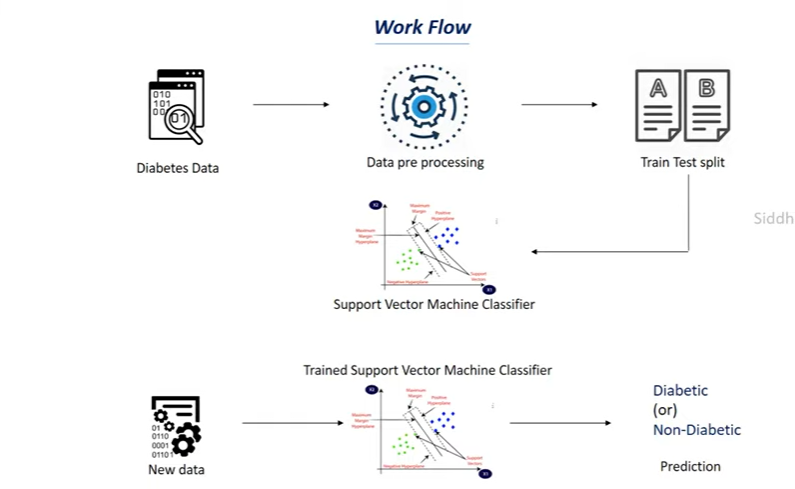

In [3]:
#importing the dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler #this will help to standsrdize the data to a common range
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [7]:
#data collection and analysis
diabetes_data = pd.read_csv('/content/Project_2_Diabetes_Data.csv')

In [8]:
#printing the first few data from the data set
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# total no of rows and column in our data
diabetes_data.shape

(768, 9)

In [10]:
# some more statistical information on data
diabetes_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#checking null and data type for each column
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# checking for the value of data in outcome to be balanced or not
diabetes_data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [13]:
#it is not a balanced dataset
# 0 --> non diabetic
# 1 --> diabetic


In [14]:
diabetes_data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [15]:
#seperating data and label and storing them
X = diabetes_data.drop(columns='Outcome', axis=1)
Y = diabetes_data['Outcome']

print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


## Data Standardization

we standardize the data when different column have differenet range of values

range of pregnencies (1-10)
glucose level ranges in hundreds

when there is a difference in range of values, it is difficult for model to make predictions
therefore we will standardize data

In [16]:
# we use standard scaler function to standardize data

#creating a instance of this function
scaler =  StandardScaler()

In [17]:
#then we pass the features into this function for standardizing
scaler.fit(X)

#transforming all the fetures into a common range
standardized_data = scaler.transform(X)

# we can also do a common for both the steps
# scaler.fit.transform(X)

In [18]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [20]:
#now we can give this standardized data to our feature variable again

X = standardized_data
Y = diabetes_data['Outcome']

print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [21]:
#splitting the data into training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, train_size=0.2, stratify=Y)

In [25]:
# checking the shape of dataset
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (153, 8) (615, 8)


In [26]:
# storing the instance of the model within a variable
classifier = svm.SVC(kernel = "linear" )

In [27]:
# training the model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [36]:
# model evaluation

# accuracy score on training data
y_train_predicted = classifier.predict(X_train)
accuracy_score_training = accuracy_score(Y_train, y_train_predicted)
accuracy_score_training = round(accuracy_score_training,2)
print('Training data accuracy :', accuracy_score_training*100, '%')

# accuracy score on test data
y_test_predicted = classifier.predict(X_test)
accuracy_score_testing = accuracy_score(Y_test, y_test_predicted)
accuracy_score_testing = round(accuracy_score_testing,2)
print('Testing data accuracy :', accuracy_score_testing*100, '%')

Training data accuracy : 80.0 %
Testing data accuracy : 77.0 %


In [44]:
# making a predictive system

# we make a variable to pass our input data
input_data = (2,197,70,45,543,30.5,0.158,53)


# converting into a numpy array as processing is faster and easy
input_data_np_array = np.asarray(input_data)

#reshaping the numpy array as we are prdicting for one instance
input_data_reshaped = input_data_np_array.reshape(1,-1)

#standardizing the input data
standard_data = scaler.transform(input_data_reshaped)
print(standard_data)

[[-0.54791859  2.38188392  0.04624525  1.53455054  4.02192191 -0.18943689
  -0.94794368  1.68125866]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:

# the predict function is used to check the result for an given input

prediction = classifier.predict(input_data_reshaped)

#the output that we recieve from the machine learning model is a list and not an integer, therefore we will have to check the first element of the list

if prediction[0] == 0:
  print("Non Diabetic")
else: print("Diabetic")



Diabetic
